In [1]:
import pandas as pd
import numpy as np
import os

In [15]:
file_name = "data/bitcoin_2020-06-30_2025-06-29.csv"
try:
    df = pd.read_csv(file_name)
    print("\n--- Pandas DataFrame ---")
    print("DataFrame Head:")
    print(df.head())
    print("\nDataFrame Info (data types):")
    df.info()

    # reverse to get ascending
    df = df.iloc[::-1]

    date_and_open_price_df = df[['Start', 'Open']]
    # get the reversed array
    date_and_open_price_array = date_and_open_price_df.to_numpy()
    print(date_and_open_price_array)

    # TODO: figure out how to call utils.segmentation.py

except Exception as e:
    print(e)



--- Pandas DataFrame ---
DataFrame Head:
        Start         End      Open      High       Low     Close  \
0  2025-06-28  2025-06-29  106967.0  107490.0  106811.0  107304.0   
1  2025-06-27  2025-06-28  106991.0  107622.0  106429.0  107054.0   
2  2025-06-26  2025-06-27  107380.0  108245.0  106772.0  106943.0   
3  2025-06-25  2025-06-26  106040.0  108061.0  105860.0  107251.0   
4  2025-06-24  2025-06-25  105387.0  106217.0  104698.0  106000.0   

         Volume    Market Cap  
0  3.097493e+10  2.133014e+12  
1  4.088859e+10  2.128720e+12  
2  4.655647e+10  2.136491e+12  
3  4.784476e+10  2.126670e+12  
4  7.378507e+10  2.095290e+12  

DataFrame Info (data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       1825 non-null   object 
 1   End         1825 non-null   object 
 2   Open        1825 non-null   float64
 3   High 

In [4]:
from bitfund.utils import segmentation as sg

In [21]:
penalty_lambda = 100000000.0
segments = sg.segment_time_series_constant_model_np(date_and_open_price_array, 200000000.0)
print(f"Found {len(segments)} segments.")
for i, seg in enumerate(segments):
    print(f"Segment {i + 1}: from x={seg[0, 0]} to x={seg[-1, 0]} (length {len(seg)})")


Found 40 segments.
Segment 1: from x=2020-06-30 to x=2020-11-05 (length 129)
Segment 2: from x=2020-11-06 to x=2020-12-17 (length 42)
Segment 3: from x=2020-12-18 to x=2021-01-02 (length 16)
Segment 4: from x=2021-01-03 to x=2021-02-08 (length 37)
Segment 5: from x=2021-02-09 to x=2021-03-09 (length 29)
Segment 6: from x=2021-03-10 to x=2021-05-12 (length 64)
Segment 7: from x=2021-05-13 to x=2021-05-19 (length 7)
Segment 8: from x=2021-05-20 to x=2021-06-21 (length 33)
Segment 9: from x=2021-06-22 to x=2021-07-26 (length 35)
Segment 10: from x=2021-07-27 to x=2021-08-07 (length 12)
Segment 11: from x=2021-08-08 to x=2021-10-05 (length 59)
Segment 12: from x=2021-10-06 to x=2021-10-15 (length 10)
Segment 13: from x=2021-10-16 to x=2021-11-18 (length 34)
Segment 14: from x=2021-11-19 to x=2021-12-04 (length 16)
Segment 15: from x=2021-12-05 to x=2022-01-05 (length 32)
Segment 16: from x=2022-01-06 to x=2022-05-08 (length 123)
Segment 17: from x=2022-05-09 to x=2022-06-13 (length 36)
Seg

Segment 1: from x=2020-06-30 to x=2020-11-05 (length 129)
Segment 2: from x=2020-11-06 to x=2020-12-17 (length 42)
Segment 3: from x=2020-12-18 to x=2021-01-02 (length 16)
Segment 4: from x=2021-01-03 to x=2021-02-08 (length 37)
Segment 5: from x=2021-02-09 to x=2021-03-09 (length 29)
Segment 6: from x=2021-03-10 to x=2021-05-12 (length 64)
Segment 7: from x=2021-05-13 to x=2021-05-19 (length 7)
Segment 8: from x=2021-05-20 to x=2021-06-21 (length 33)
Segment 9: from x=2021-06-22 to x=2021-07-26 (length 35)
Segment 10: from x=2021-07-27 to x=2021-08-07 (length 12)
Segment 11: from x=2021-08-08 to x=2021-10-05 (length 59)
Segment 12: from x=2021-10-06 to x=2021-10-15 (length 10)
Segment 13: from x=2021-10-16 to x=2021-11-18 (length 34)
Segment 14: from x=2021-11-19 to x=2021-12-04 (length 16)
Segment 15: from x=2021-12-05 to x=2022-01-05 (length 32)
Segment 16: from x=2022-01-06 to x=2022-05-08 (length 123)
Segment 17: from x=2022-05-09 to x=2022-06-13 (length 36)
Segment 18: from x=202

/var/folders/yq/c0h4z5t54_j3kff7h_6n6w940000gn/T/ipykernel_42391/3770867625.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(segments))


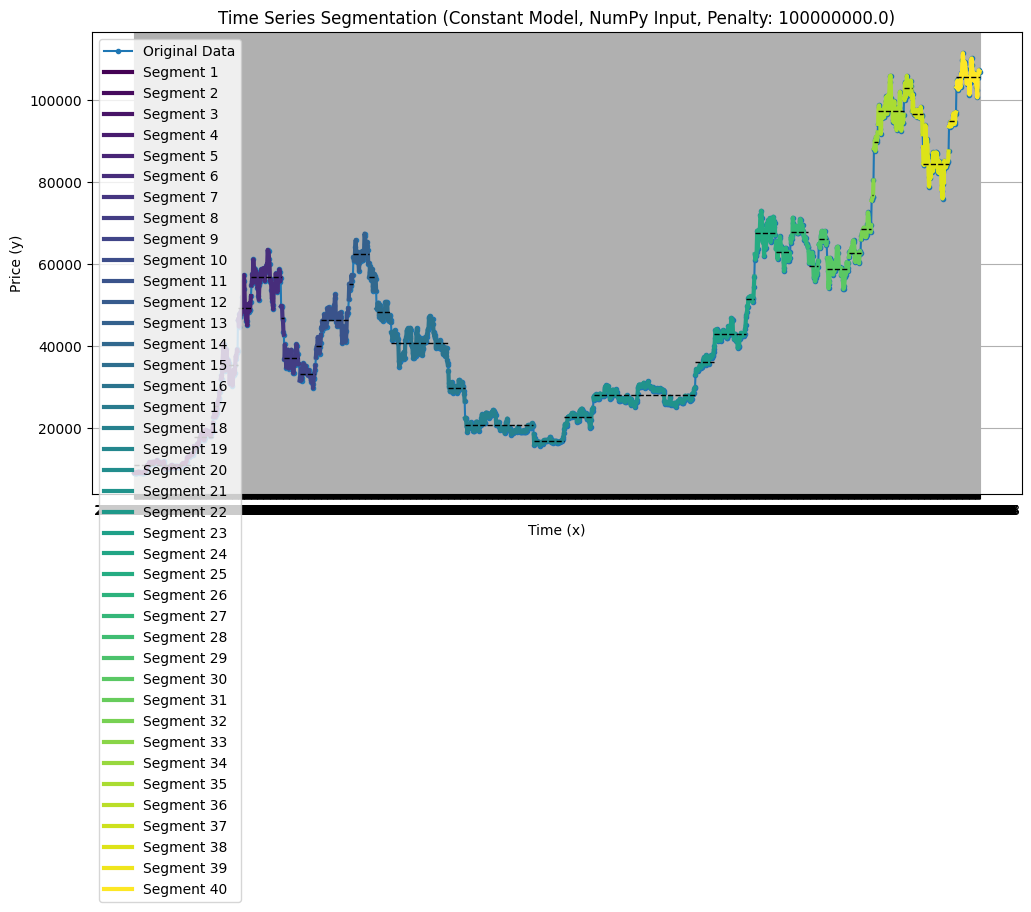

In [22]:
import matplotlib.pyplot as plt

time = date_and_open_price_array[:, 0].tolist()
price = date_and_open_price_array[:, 1].tolist()
for i, seg in enumerate(segments):
    # When printing, use seg[0, 0] for x_start and seg[-1, 0] for x_end
    print(f"Segment {i + 1}: from x={seg[0, 0]} to x={seg[-1, 0]} (length {len(seg)})")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time, price, 'o-', markersize=3, label='Original Data')

colors = plt.cm.get_cmap('viridis', len(segments))
for i, segment in enumerate(segments):
    seg_x = segment[:, 0]
    seg_y = segment[:, 1]
    plt.plot(seg_x, seg_y, '-', linewidth=3, color=colors(i), label=f'Segment {i + 1}')

    # Plot the mean value for the constant model
    if len(seg_y) > 0:
        mean_val = np.mean(seg_y)
        plt.plot(seg_x, [mean_val] * len(seg_x), '--', color='black', linewidth=1)

plt.title(f'Time Series Segmentation (Constant Model, NumPy Input, Penalty: {penalty_lambda})')
plt.xlabel('Time (x)')
plt.ylabel('Price (y)')
plt.legend()
plt.grid(True)
plt.show()

penalty_base = 100000000.0
seg_map = {}
for i in range(30):
    penalty_lambda = penalty_base * (i+1)
    print(f"testing {i+1}th penalty with {penalty_lambda}")
    segments = sg.segment_time_series_constant_model_np(date_and_open_price_array, penalty_lambda)
    print(f"#segments: {len(segments)}, maxlen: {max([len(seg) for seg in segments])}, minlen: {min([len(seg) for seg in segments])}")
    seg_map[penalty_lambda] = segments

In [33]:
for i,segments in seg_map.items():
    print(f"penalty:{i}:#segments: {len(segments)}, maxlen: {max([len(seg) for seg in segments])}, minlen: {min([len(seg) for seg in segments])}")


penalty:100000000.0:#segments: 60, maxlen: 114, minlen: 5
penalty:200000000.0:#segments: 40, maxlen: 220, minlen: 5
penalty:300000000.0:#segments: 28, maxlen: 220, minlen: 7
penalty:400000000.0:#segments: 27, maxlen: 220, minlen: 10
penalty:500000000.0:#segments: 26, maxlen: 220, minlen: 10
penalty:600000000.0:#segments: 24, maxlen: 274, minlen: 10
penalty:700000000.0:#segments: 23, maxlen: 274, minlen: 16
penalty:800000000.0:#segments: 23, maxlen: 274, minlen: 16
penalty:900000000.0:#segments: 23, maxlen: 274, minlen: 16
penalty:1000000000.0:#segments: 21, maxlen: 274, minlen: 16
penalty:1100000000.0:#segments: 21, maxlen: 274, minlen: 16
penalty:1200000000.0:#segments: 21, maxlen: 274, minlen: 16
penalty:1300000000.0:#segments: 19, maxlen: 274, minlen: 16
penalty:1400000000.0:#segments: 18, maxlen: 274, minlen: 33
penalty:1500000000.0:#segments: 17, maxlen: 274, minlen: 38
penalty:1600000000.0:#segments: 17, maxlen: 274, minlen: 38
penalty:1700000000.0:#segments: 16, maxlen: 274, min

In [ ]:
def plot_segments(date_and_open_price_array, segments):
    time = date_and_open_price_array[:, 0].tolist()
    price = date_and_open_price_array[:, 1].tolist()
    for i, seg in enumerate(segments):
        # When printing, use seg[0, 0] for x_start and seg[-1, 0] for x_end
        print(f"Segment {i + 1}: from x={seg[0, 0]} to x={seg[-1, 0]} (length {len(seg)})")
    
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(time, price, 'o-', markersize=3, label='Original Data')
    
    colors = plt.cm.get_cmap('viridis', len(segments))
    for i, segment in enumerate(segments):
        seg_x = segment[:, 0]
        seg_y = segment[:, 1]
        plt.plot(seg_x, seg_y, '-', linewidth=3, color=colors(i), label=f'Segment {i + 1}')
    
        # Plot the mean value for the constant model
        if len(seg_y) > 0:
            mean_val = np.mean(seg_y)
            plt.plot(seg_x, [mean_val] * len(seg_x), '--', color='black', linewidth=1)
    
    plt.title(f'Time Series Segmentation (Constant Model, NumPy Input, Penalty: {penalty_lambda})')
    plt.xlabel('Time (x)')
    plt.ylabel('Price (y)')
    plt.legend()
    plt.grid(True)
    plt.show()

Segment 1: from x=2020-06-30 to x=2020-12-17 (length 171)
Segment 2: from x=2020-12-18 to x=2021-02-08 (length 53)
Segment 3: from x=2021-02-09 to x=2021-05-17 (length 98)
Segment 4: from x=2021-05-18 to x=2021-08-06 (length 81)
Segment 5: from x=2021-08-07 to x=2021-10-06 (length 61)
Segment 6: from x=2021-10-07 to x=2021-12-04 (length 59)
Segment 7: from x=2021-12-05 to x=2022-05-09 (length 156)
Segment 8: from x=2022-05-10 to x=2023-03-16 (length 311)
Segment 9: from x=2023-03-17 to x=2023-11-09 (length 238)
Segment 10: from x=2023-11-10 to x=2024-02-26 (length 109)
Segment 11: from x=2024-02-27 to x=2024-11-11 (length 259)
Segment 12: from x=2024-11-12 to x=2025-02-25 (length 106)
Segment 13: from x=2025-02-26 to x=2025-05-01 (length 65)
Segment 14: from x=2025-05-02 to x=2025-06-28 (length 58)


/var/folders/yq/c0h4z5t54_j3kff7h_6n6w940000gn/T/ipykernel_42391/127740325.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(segments))


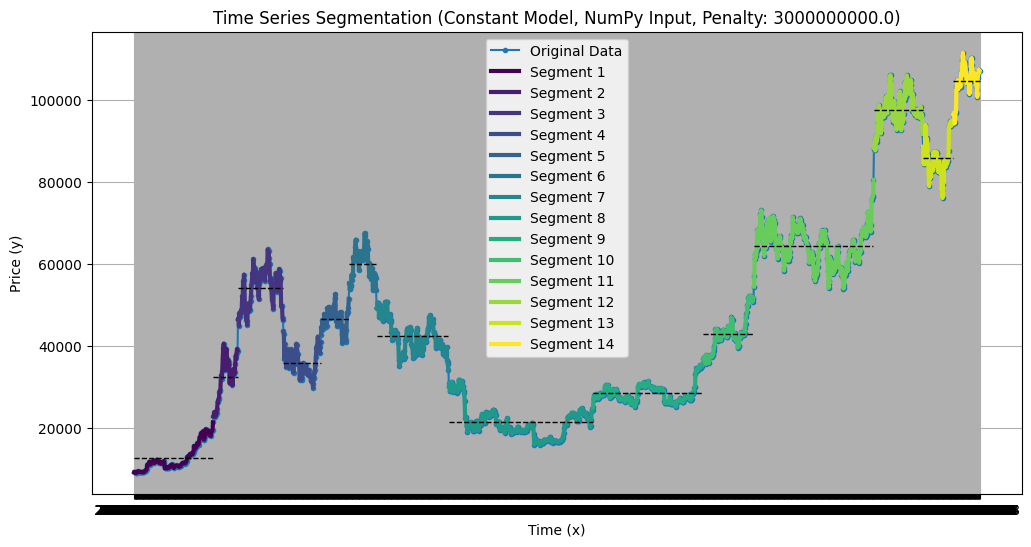

In [30]:
plot_segments(date_and_open_price_array, seg_map[30*penalty_base])

Segment 1: from x=2020-06-30 to x=2020-11-05 (length 129)
Segment 2: from x=2020-11-06 to x=2020-12-28 (length 53)
Segment 3: from x=2020-12-29 to x=2021-02-08 (length 42)
Segment 4: from x=2021-02-09 to x=2021-05-17 (length 98)
Segment 5: from x=2021-05-18 to x=2021-08-06 (length 81)
Segment 6: from x=2021-08-07 to x=2021-10-06 (length 61)
Segment 7: from x=2021-10-07 to x=2021-12-03 (length 58)
Segment 8: from x=2021-12-04 to x=2022-01-05 (length 33)
Segment 9: from x=2022-01-06 to x=2022-05-08 (length 123)
Segment 10: from x=2022-05-09 to x=2022-06-13 (length 36)
Segment 11: from x=2022-06-14 to x=2023-03-14 (length 274)
Segment 12: from x=2023-03-15 to x=2023-10-23 (length 223)
Segment 13: from x=2023-10-24 to x=2023-12-04 (length 42)
Segment 14: from x=2023-12-05 to x=2024-02-27 (length 85)
Segment 15: from x=2024-02-28 to x=2024-06-23 (length 117)
Segment 16: from x=2024-06-24 to x=2024-10-14 (length 113)
Segment 17: from x=2024-10-15 to x=2024-11-11 (length 28)
Segment 18: from 

/var/folders/yq/c0h4z5t54_j3kff7h_6n6w940000gn/T/ipykernel_42391/127740325.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(segments))


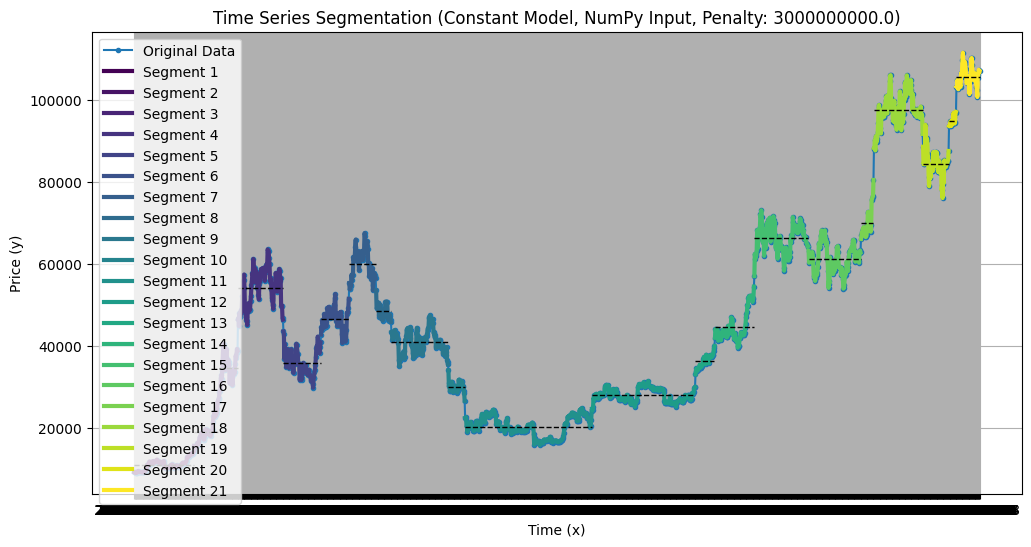

In [34]:
plot_segments(date_and_open_price_array, seg_map[10*penalty_base])

Segment 1: from x=2020-06-30 to x=2020-11-05 (length 129)
Segment 2: from x=2020-11-06 to x=2020-12-17 (length 42)
Segment 3: from x=2020-12-18 to x=2021-01-02 (length 16)
Segment 4: from x=2021-01-03 to x=2021-02-08 (length 37)
Segment 5: from x=2021-02-09 to x=2021-03-09 (length 29)
Segment 6: from x=2021-03-10 to x=2021-05-12 (length 64)
Segment 7: from x=2021-05-13 to x=2021-05-19 (length 7)
Segment 8: from x=2021-05-20 to x=2021-06-21 (length 33)
Segment 9: from x=2021-06-22 to x=2021-07-26 (length 35)
Segment 10: from x=2021-07-27 to x=2021-08-07 (length 12)
Segment 11: from x=2021-08-08 to x=2021-10-05 (length 59)
Segment 12: from x=2021-10-06 to x=2021-10-15 (length 10)
Segment 13: from x=2021-10-16 to x=2021-11-18 (length 34)
Segment 14: from x=2021-11-19 to x=2021-12-04 (length 16)
Segment 15: from x=2021-12-05 to x=2022-01-05 (length 32)
Segment 16: from x=2022-01-06 to x=2022-05-08 (length 123)
Segment 17: from x=2022-05-09 to x=2022-06-13 (length 36)
Segment 18: from x=202

/var/folders/yq/c0h4z5t54_j3kff7h_6n6w940000gn/T/ipykernel_42391/127740325.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(segments))


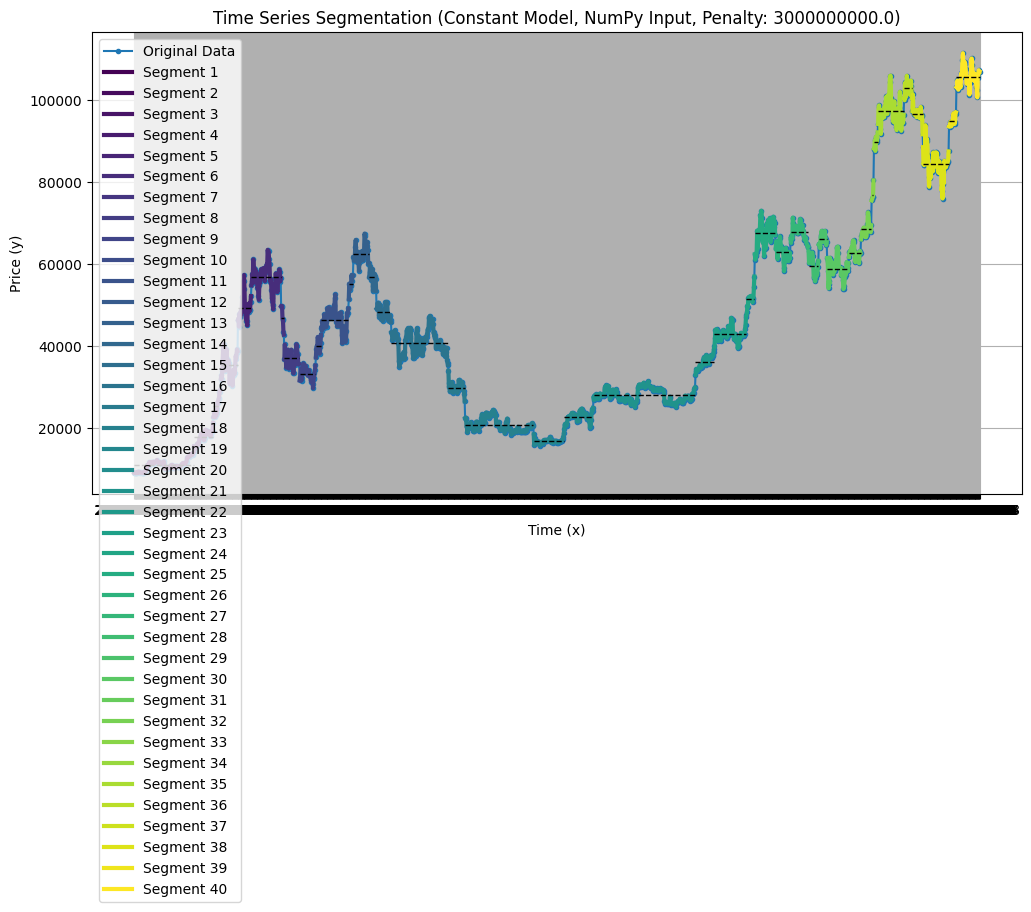

In [37]:
plot_segments(date_and_open_price_array, seg_map[2*penalty_base])

# Testing running segmenatation algorithm

Initial batch segmentation completed with 12 segments.
Processed point at x=['2023-10-13' 26759.66]. Current segments: 12
...........................number of data points so far 1200
numer of segments with 0 running data points: 12
Segment 1: from x=2020-06-30 to x=2020-11-05 (length 129)
Segment 2: from x=2020-11-06 to x=2020-12-28 (length 53)
Segment 3: from x=2020-12-29 to x=2021-02-08 (length 42)
Segment 4: from x=2021-02-09 to x=2021-05-17 (length 98)
Segment 5: from x=2021-05-18 to x=2021-08-06 (length 81)
Segment 6: from x=2021-08-07 to x=2021-10-06 (length 61)
Segment 7: from x=2021-10-07 to x=2021-12-03 (length 58)
Segment 8: from x=2021-12-04 to x=2022-01-05 (length 33)
Segment 9: from x=2022-01-06 to x=2022-05-08 (length 123)
Segment 10: from x=2022-05-09 to x=2022-06-13 (length 36)
Segment 11: from x=2022-06-14 to x=2023-03-14 (length 274)
Segment 12: from x=2023-03-15 to x=2023-10-13 (length 213)


/var/folders/yq/c0h4z5t54_j3kff7h_6n6w940000gn/T/ipykernel_42391/127740325.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(segments))


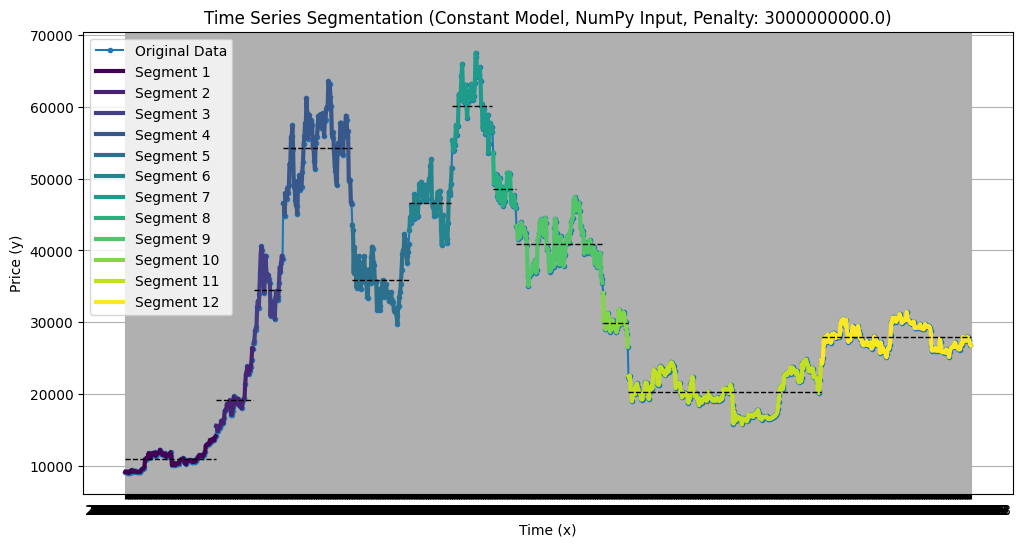

Processed point at x=['2023-10-14' 26862.0]. Current segments: 12
Processed point at x=['2023-10-15' 26852.47]. Current segments: 12
Processed point at x=['2023-10-16' 27154.1]. Current segments: 12
Processed point at x=['2023-10-17' 28500.82]. Current segments: 12
Processed point at x=['2023-10-18' 28395.92]. Current segments: 12
Processed point at x=['2023-10-19' 28320.02]. Current segments: 12
Processed point at x=['2023-10-20' 28717.81]. Current segments: 12
Processed point at x=['2023-10-21' 29669.08]. Current segments: 12
Processed point at x=['2023-10-22' 29909.78]. Current segments: 12
Processed point at x=['2023-10-23' 29989.04]. Current segments: 12
Processed point at x=['2023-10-24' 33062.93]. Current segments: 12
Processed point at x=['2023-10-25' 33915.21]. Current segments: 12
Processed point at x=['2023-10-26' 34494.38]. Current segments: 12
Processed point at x=['2023-10-27' 34151.63]. Current segments: 12
Processed point at x=['2023-10-28' 33892.03]. Current segments: 

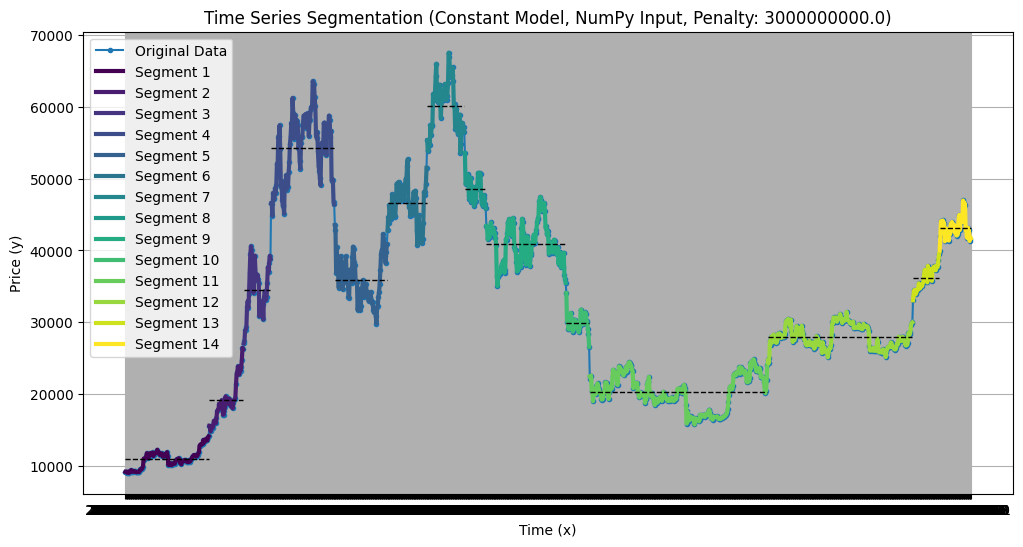

Processed point at x=['2024-01-22' 41580.35]. Current segments: 14
Processed point at x=['2024-01-23' 39567.96]. Current segments: 14
Processed point at x=['2024-01-24' 39904.06]. Current segments: 14
Processed point at x=['2024-01-25' 40085.18]. Current segments: 14
Processed point at x=['2024-01-26' 39961.1]. Current segments: 14
Processed point at x=['2024-01-27' 41814.0]. Current segments: 14
Processed point at x=['2024-01-28' 42098.02]. Current segments: 14
Processed point at x=['2024-01-29' 42031.02]. Current segments: 14
Processed point at x=['2024-01-30' 43302.73]. Current segments: 14
Processed point at x=['2024-01-31' 42945.4]. Current segments: 14
Processed point at x=['2024-02-01' 42587.2]. Current segments: 14
Processed point at x=['2024-02-02' 43082.94]. Current segments: 14
Processed point at x=['2024-02-03' 43185.79]. Current segments: 14
Processed point at x=['2024-02-04' 43006.66]. Current segments: 14
Processed point at x=['2024-02-05' 42582.94]. Current segments: 14

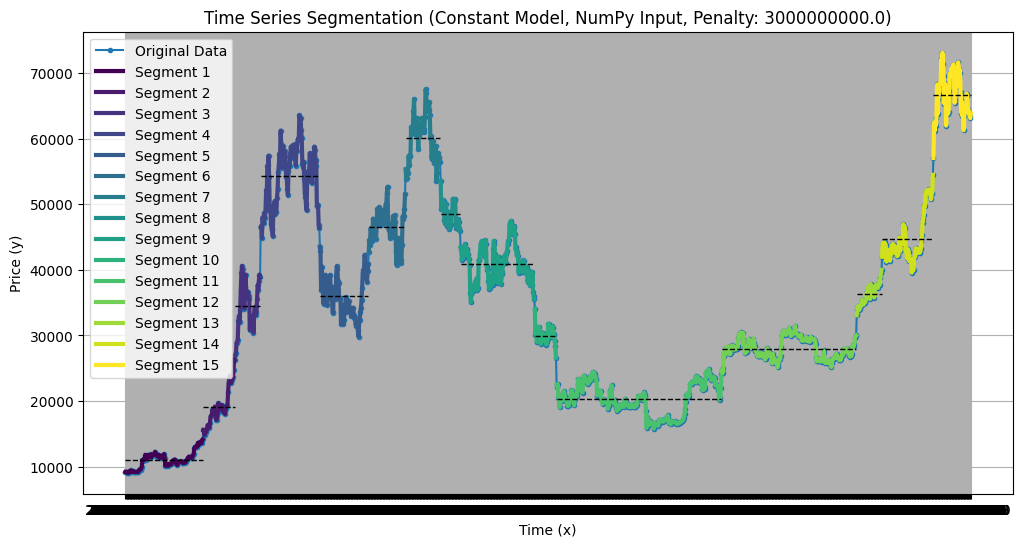

Processed point at x=['2024-05-01' 60669.84]. Current segments: 15
Processed point at x=['2024-05-02' 58365.01]. Current segments: 15
Processed point at x=['2024-05-03' 59112.48]. Current segments: 15
Processed point at x=['2024-05-04' 62870.12]. Current segments: 15
Processed point at x=['2024-05-05' 63893.95]. Current segments: 15
Processed point at x=['2024-05-06' 64011.98]. Current segments: 15
Processed point at x=['2024-05-07' 63165.14]. Current segments: 15
Processed point at x=['2024-05-08' 62312.12]. Current segments: 15
Processed point at x=['2024-05-09' 61203.59]. Current segments: 15
Processed point at x=['2024-05-10' 63074.05]. Current segments: 15
Processed point at x=['2024-05-11' 60800.03]. Current segments: 15
Processed point at x=['2024-05-12' 60816.04]. Current segments: 15
Processed point at x=['2024-05-13' 61444.49]. Current segments: 15
Processed point at x=['2024-05-14' 62940.1]. Current segments: 15
Processed point at x=['2024-05-15' 61577.48]. Current segments:

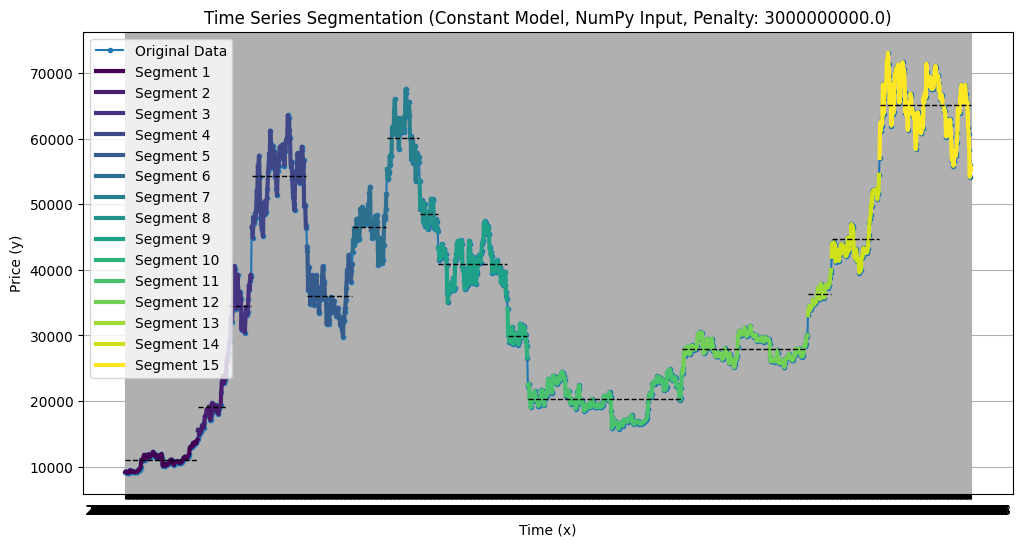

Processed point at x=['2024-08-09' 61642.59]. Current segments: 15
Processed point at x=['2024-08-10' 60707.54]. Current segments: 15
Processed point at x=['2024-08-11' 60958.03]. Current segments: 15
Processed point at x=['2024-08-12' 58804.02]. Current segments: 15
Processed point at x=['2024-08-13' 59455.98]. Current segments: 15
Processed point at x=['2024-08-14' 60460.83]. Current segments: 15
Processed point at x=['2024-08-15' 58731.42]. Current segments: 15
Processed point at x=['2024-08-16' 57523.11]. Current segments: 15
Processed point at x=['2024-08-17' 58902.94]. Current segments: 15
Processed point at x=['2024-08-18' 59479.04]. Current segments: 15
Processed point at x=['2024-08-19' 58320.02]. Current segments: 15
Processed point at x=['2024-08-20' 59448.0]. Current segments: 15
Processed point at x=['2024-08-21' 59114.41]. Current segments: 15
Processed point at x=['2024-08-22' 61167.48]. Current segments: 15
Processed point at x=['2024-08-23' 60392.09]. Current segments:

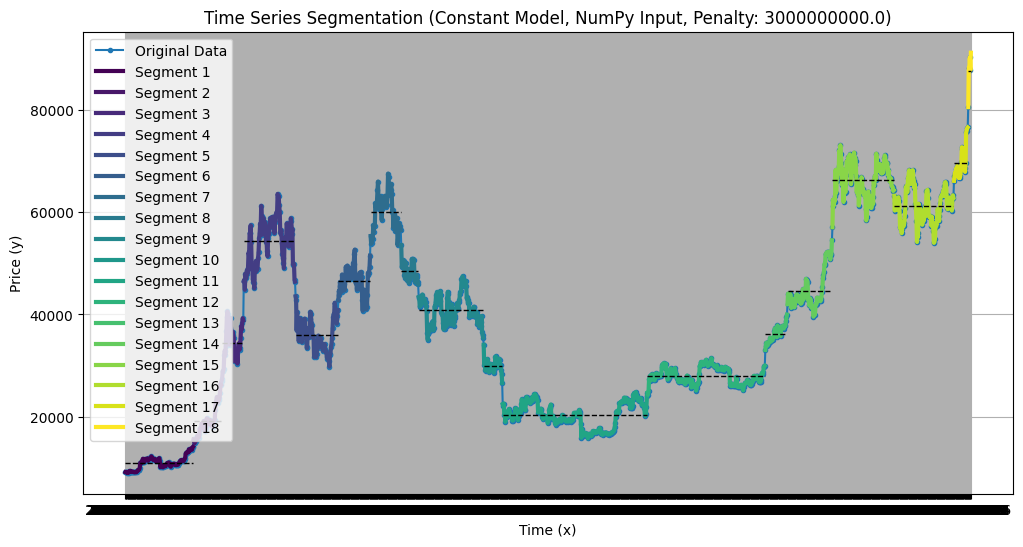

Processed point at x=['2024-11-17' 90642.34]. Current segments: 18
Processed point at x=['2024-11-18' 89782.53]. Current segments: 18
Processed point at x=['2024-11-19' 90406.06]. Current segments: 18
Processed point at x=['2024-11-20' 92212.04]. Current segments: 18
Processed point at x=['2024-11-21' 94267.41]. Current segments: 18
Processed point at x=['2024-11-22' 98311.38]. Current segments: 18
Processed point at x=['2024-11-23' 98788.34]. Current segments: 18
Processed point at x=['2024-11-24' 97693.54]. Current segments: 18
Processed point at x=['2024-11-25' 97736.05]. Current segments: 18
Processed point at x=['2024-11-26' 93064.01]. Current segments: 18
Processed point at x=['2024-11-27' 91826.51]. Current segments: 18
Processed point at x=['2024-11-28' 95850.02]. Current segments: 18
Processed point at x=['2024-11-29' 95627.24]. Current segments: 18
Processed point at x=['2024-11-30' 97317.53]. Current segments: 18
Processed point at x=['2024-12-01' 96505.88]. Current segments

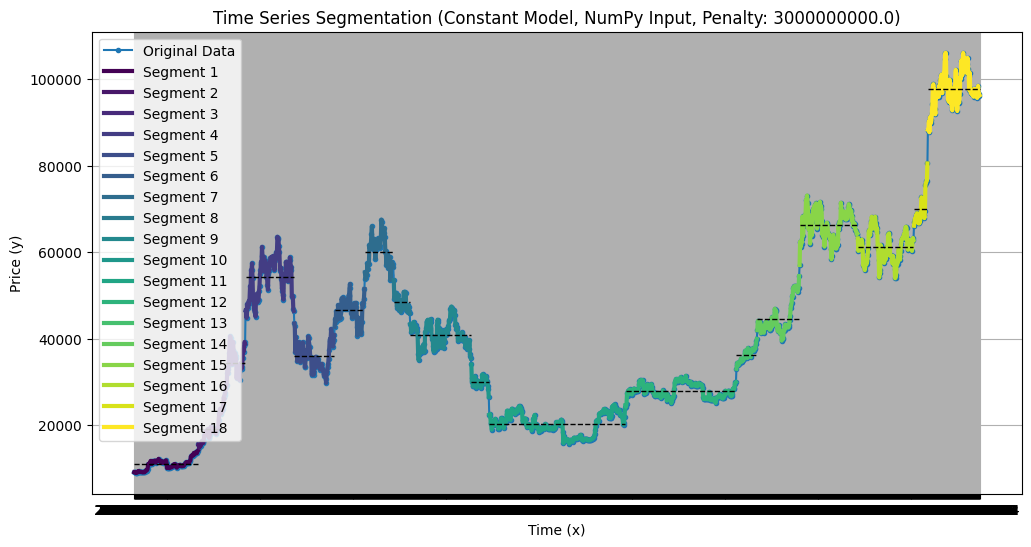

Processed point at x=['2025-02-25' 91725.79]. Current segments: 18
Processed point at x=['2025-02-26' 88600.08]. Current segments: 18
Processed point at x=['2025-02-27' 84352.25]. Current segments: 18
Processed point at x=['2025-02-28' 84874.36]. Current segments: 18
Processed point at x=['2025-03-01' 84307.46]. Current segments: 18
Processed point at x=['2025-03-02' 86055.01]. Current segments: 18
Processed point at x=['2025-03-03' 93956.01]. Current segments: 18
Processed point at x=['2025-03-04' 86086.02]. Current segments: 18
Processed point at x=['2025-03-05' 87062.04]. Current segments: 18
Processed point at x=['2025-03-06' 90680.38]. Current segments: 18
Processed point at x=['2025-03-07' 90117.99]. Current segments: 18
Processed point at x=['2025-03-08' 86715.98]. Current segments: 19
Processed point at x=['2025-03-09' 86164.45]. Current segments: 19
Processed point at x=['2025-03-10' 81277.03]. Current segments: 19
Processed point at x=['2025-03-11' 78951.25]. Current segments

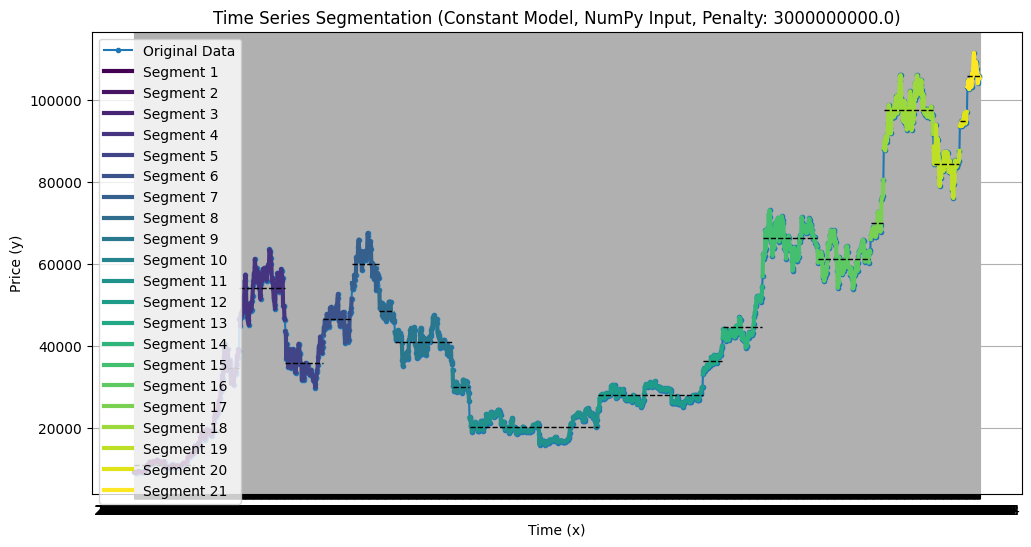

Processed point at x=['2025-06-05' 104763.0]. Current segments: 21
Processed point at x=['2025-06-06' 101442.0]. Current segments: 21
Processed point at x=['2025-06-07' 104267.0]. Current segments: 21
Processed point at x=['2025-06-08' 105512.0]. Current segments: 21
Processed point at x=['2025-06-09' 105725.0]. Current segments: 21
Processed point at x=['2025-06-10' 110185.0]. Current segments: 21
Processed point at x=['2025-06-11' 110237.0]. Current segments: 21
Processed point at x=['2025-06-12' 108590.0]. Current segments: 21
Processed point at x=['2025-06-13' 104938.0]. Current segments: 21
Processed point at x=['2025-06-14' 106020.0]. Current segments: 21
Processed point at x=['2025-06-15' 105364.0]. Current segments: 21
Processed point at x=['2025-06-16' 105600.0]. Current segments: 21
Processed point at x=['2025-06-17' 106593.0]. Current segments: 21
Processed point at x=['2025-06-18' 104583.0]. Current segments: 21
Processed point at x=['2025-06-19' 104849.0]. Current segments

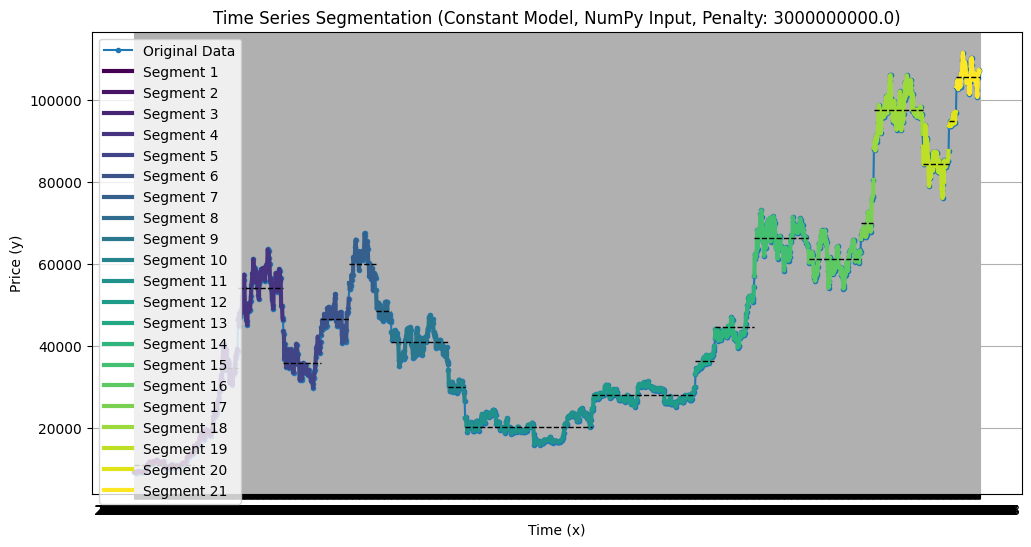

In [63]:
initial_data_array=date_and_open_price_array[0:1200,:] #0-1200
running_data_array=date_and_open_price_array[1200:,:] #1200-1825
from bitfund.utils import segmentation_running as sgr
sgr_penalty=100000000.0*10
segmenter = sgr.ConsistentRunningSegmenter(initial_data_array=initial_data_array,
                                           penalty_lambda=sgr_penalty,
                                           cost_func='constant')
# plot_segments(initial_data_array, segmenter.get_segments())

for i in range(len(running_data_array)):
    # if i % 100 == 0 or i == len(running_data_array)-1:
    #     segments = segmenter.get_segments()
    #     print(f"numer of segments with {i} running data points: {len(segments)}")
    #     plot_segments(np.vstack((initial_data_array, running_data_array[0:i,:])), segments)
    new_point = running_data_array[i:i + 1]  # Get as a (1,2) array for vstack
    segmenter.process_new_point(new_point)
    if i % 100 == 0 or i == len(running_data_array)-1:
        sofar_data = np.vstack((initial_data_array, running_data_array[0:i,:]))
        print(f"...........................number of data points so far {len(sofar_data)}")
        print(f"numer of segments with {i} running data points: {len(segmenter.get_segments())}")
        plot_segments(sofar_data, segmenter.get_segments())

# TODO (The above running algorithm seems stable on BitCoin)
* Plot MSTR/BitCoin to see if it's stable
* Find new penalty function based on its flunctuation
* Run simulation to see P/L, max regression, etc.
* Hook the algorithm with paper trading account and setup alarm on daily basis